In [82]:
import sys
from os import listdir
import os

from xml.dom.minidom import parse
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [83]:
#datadir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Train/MedLine/"
datadir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Train/DrugBank/"
print(datadir)

/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Train/DrugBank/


In [84]:
#test_dir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Test-NER/MedLine/"
test_dir = "/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Test-NER/DrugBank/"
print(test_dir)

/Users/lluccardoner/PycharmProjects/MET_AHLT_Lab_2019/data/Test-NER/DrugBank/


# Load data

In [85]:
trees = []
for f in listdir(datadir):
    # parse XML file
    tree = parse(datadir + "/" + f)
    trees.append(tree)

In [86]:
items = []
for tree in trees:
    for s in tree.getElementsByTagName("sentence"):
        s_id = s.attributes["id"].value
        s_txt = s.attributes["text"].value
        for e in s.getElementsByTagName("entity"):
            e_id = e.attributes["id"].value
            e_offset = e.attributes["charOffset"].value 
            e_name = e.attributes["text"].value
            e_type = e.attributes["type"].value
            item = {"s_id": s_id, "s_txt": s_txt, "e_id": e_id, "e_offset": e_offset, "e_name": e_name, "e_type": e_type}
            items.append(item)

In [87]:
df = pd.DataFrame(items)
df.shape

(12929, 6)

In [88]:
df.head()

,e_id,e_name,e_offset,e_type,s_id,s_txt
0,DDI-DrugBank.d481.s0.e0,calcium,25-31,drug,DDI-DrugBank.d481.s0,"Milk, milk products, and calcium-rich foods or..."
1,DDI-DrugBank.d481.s0.e1,EMCYT,82-86,brand,DDI-DrugBank.d481.s0,"Milk, milk products, and calcium-rich foods or..."
2,DDI-DrugBank.d419.s0.e0,allopurinol,33-43,drug,DDI-DrugBank.d419.s0,The concurrent administration of allopurinol a...
3,DDI-DrugBank.d419.s0.e1,ampicillin,49-58,drug,DDI-DrugBank.d419.s0,The concurrent administration of allopurinol a...
4,DDI-DrugBank.d419.s0.e2,ampicillin,175-184,drug,DDI-DrugBank.d419.s0,The concurrent administration of allopurinol a...


# Features

## Is upper

In [89]:
df['e_is_upper'] = df['e_name'].apply(lambda x : x.isupper())

## Suffix

In [90]:
df['e_suffix'] = df['e_name'].apply(lambda x : x[-5:])

## Plural

In [91]:
df['e_plural'] = df['e_name'].apply(lambda x : x[-1:] == 's')

## Part Of Speech

In [92]:
df['e_pos'] = df['e_name'].apply(lambda x : nltk.pos_tag([x])[0][1])

In [93]:
df

,e_id,e_name,e_offset,e_type,s_id,s_txt,e_is_upper,e_suffix,e_plural,e_pos
0,DDI-DrugBank.d481.s0.e0,calcium,25-31,drug,DDI-DrugBank.d481.s0,"Milk, milk products, and calcium-rich foods or...",False,lcium,False,NN
1,DDI-DrugBank.d481.s0.e1,EMCYT,82-86,brand,DDI-DrugBank.d481.s0,"Milk, milk products, and calcium-rich foods or...",True,EMCYT,False,NN
2,DDI-DrugBank.d419.s0.e0,allopurinol,33-43,drug,DDI-DrugBank.d419.s0,The concurrent administration of allopurinol a...,False,rinol,False,NN
3,DDI-DrugBank.d419.s0.e1,ampicillin,49-58,drug,DDI-DrugBank.d419.s0,The concurrent administration of allopurinol a...,False,illin,False,NN
4,DDI-DrugBank.d419.s0.e2,ampicillin,175-184,drug,DDI-DrugBank.d419.s0,The concurrent administration of allopurinol a...,False,illin,False,NN
5,DDI-DrugBank.d419.s1.e0,ampicillin,45-54,drug,DDI-DrugBank.d419.s1,It is not known whether this potentiation of a...,False,illin,False,NN
6,DDI-DrugBank.d419.s1.e1,allopurinol,73-83,drug,DDI-DrugBank.d419.s1,It is not known whether this potentiation of a...,False,rinol,False,NN
7,DDI-DrugBank.d419.s2.e0,AUGMENTIN XR,33-44,brand,DDI-DrugBank.d419.s2,"In controlled clinical trials of AUGMENTIN XR,...",True,IN XR,False,NN
8,DDI-DrugBank.d419.s2.e1,allopurinol,80-90,drug,DDI-DrugBank.d419.s2,"In controlled clinical trials of AUGMENTIN XR,...",False,rinol,False,NN
9,DDI-DrugBank.d419.s2.e2,AUGMENTIN XR,96-107,brand,DDI-DrugBank.d419.s2,"In controlled clinical trials of AUGMENTIN XR,...",True,IN XR,False,NN


# Input data

In [94]:
import nltk
import sklearn
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.5.
The scikit-learn version is 0.20.1.


In [95]:
label = 'e_type'
features = ['e_is_upper', 'e_suffix', 'e_plural', 'e_pos']
Y = np.array(df[label])
X = np.array(df[features])
print(Y.shape, X.shape)
print(Y[:5])
print(X[:5])

(12929,) (12929, 4)
['drug' 'brand' 'drug' 'drug' 'drug']
[[False 'lcium' False 'NN']
 [True 'EMCYT' False 'NN']
 [False 'rinol' False 'NN']
 [False 'illin' False 'NN']
 [False 'illin' False 'NN']]


In [96]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(Y)

print("Classes:",le.classes_)
Y_enc = le.transform(Y)
print(Y[0:5])
print(Y_enc[0:5])
print(Y_enc.shape)

Classes: ['brand' 'drug' 'drug_n' 'group']
['drug' 'brand' 'drug' 'drug' 'drug']
[1 0 1 1 1]
(12929,)


In [97]:
enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
enc.fit(X)

print("Categories:",enc.categories_)
X_enc = enc.transform(X)
print(X[0])
print(X_enc[0].toarray())
print(X_enc.shape)

Categories: [array([False, True], dtype=object), array([' Acid', ' B-12', ' Drug', ..., 'zomib', 'zoral', 'zosin'],
      dtype=object), array([False, True], dtype=object), array(['CD', 'IN', 'JJ', 'NN', 'NNP', 'NNS', 'RB', 'VB', 'VBG', 'VBN'],
      dtype=object)]
[False 'lcium' False 'NN']
[[1. 0. 0. ... 0. 0. 0.]]
(12929, 1029)


# Model

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
clf = DecisionTreeClassifier(random_state=42)

In [100]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_enc, Y_enc)

## Predictions

In [101]:
trees_test = []
for f in listdir(test_dir):
    # parse XML file
    tree = parse(test_dir + "/" + f)
    trees_test.append(tree)

In [102]:
items_test = []
for tree in trees_test:
    for s in tree.getElementsByTagName("sentence"):
        s_id = s.attributes["id"].value
        s_txt = s.attributes["text"].value
        for e in s.getElementsByTagName("entity"):
            e_id = e.attributes["id"].value
            e_offset = e.attributes["charOffset"].value 
            e_name = e.attributes["text"].value
            e_type = e.attributes["type"].value
            item = {"s_id": s_id, "s_txt": s_txt, "e_id": e_id, "e_offset": e_offset, "e_name": e_name, "e_type": e_type}
            items_test.append(item)

In [103]:
df_test = pd.DataFrame(items_test)
df_test.shape

(304, 6)

In [104]:
df_test['e_is_upper'] = df_test['e_name'].apply(lambda x : x.isupper())
df_test['e_suffix'] = df_test['e_name'].apply(lambda x : x[-5:])
df_test['e_plural'] = df_test['e_name'].apply(lambda x : x[-1:] == 's')
df_test['e_pos'] = df_test['e_name'].apply(lambda x : nltk.pos_tag([x])[0][1])
df_test.head()

,e_id,e_name,e_offset,e_type,s_id,s_txt,e_is_upper,e_suffix,e_plural,e_pos
0,DDI-DrugBank.d778.s0.e0,BILTRICIDE,47-56,brand,DDI-DrugBank.d778.s0,No data are available regarding interaction of...,True,ICIDE,False,NNP
1,DDI-DrugBank.d617.s0.e0,PRIMACOR,99-106,brand,DDI-DrugBank.d617.s0,No untoward clinical manifestations have been ...,True,MACOR,False,NN
2,DDI-DrugBank.d617.s0.e1,digitalis glycosides,156-175,group,DDI-DrugBank.d617.s0,No untoward clinical manifestations have been ...,False,sides,True,NNS
3,DDI-DrugBank.d617.s1.e0,lidocaine,0-8,drug,DDI-DrugBank.d617.s1,"lidocaine, quinidine;",False,caine,False,NN
4,DDI-DrugBank.d617.s1.e1,quinidine,11-19,drug,DDI-DrugBank.d617.s1,"lidocaine, quinidine;",False,idine,False,NN


In [105]:
Y_test = np.array(df_test[label])
X_test = np.array(df_test[features])
print(Y_test.shape, X_test.shape)

(304,) (304, 4)


In [106]:
Y_test_enc = le.transform(Y_test)
X_test_enc = enc.transform(X_test)
print(Y_test_enc.shape, X_test_enc.shape)

(304,) (304, 1029)


In [107]:
Y_pred = clf.predict(X_test_enc)

In [108]:
clf.score(X_test_enc, Y_test_enc)

0.9144736842105263

## Confusion matrix

In [109]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [110]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


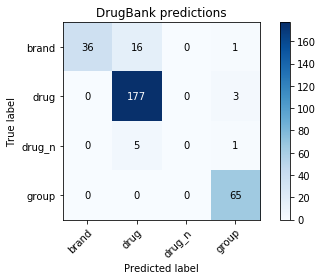

In [112]:
# Plot non-normalized confusion matrix
class_names = le.classes_
plot_confusion_matrix(Y_test_enc, Y_pred, classes=class_names, title="DrugBank predictions")
plt.show()